In [15]:
# Importing libraries
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint

from sklearn.tree import export_graphviz
from IPython.display import Image

In [16]:
# Reading and displaying the dataset
df = pd.read_csv('cleaned_earthquake.csv')
df.head(5)

,Unnamed: 0,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,year,month
0,0,6.5,2023-08-16 12:47:00,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,2023,8
1,1,6.5,2023-07-19 00:22:00,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,2023,7
2,2,6.6,2023-07-17 03:05:00,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,2023,7
3,3,7.2,2023-07-16 06:48:00,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,2023,7
4,4,7.3,2023-07-16 06:48:00,0,5,unknown,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,2023,7


In [17]:
# Putting features (x) and target (y) columns into variables

x = df[['cdi', 'mmi', 'tsunami', 'sig', 'nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude']]
y = df['alert']

In [18]:
# Splitting into 80/20 for train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [19]:
# Training the Random Forest model
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [20]:
# Predicting the test set
y_pred = rf.predict(x_test)

In [21]:
# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.92


In [22]:
# Training the model with random variables
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf,
                                 param_distributions=param_dist,
                                 n_iter=5,
                                 cv=5)

rand_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000149A404B440>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000149A60223C0>})

In [23]:
# Optimizing the model
best_rf = rand_search.best_estimator_
print('Best hyperparameters:', rand_search.best_params_)

Best hyperparameters: {'max_depth': 18, 'n_estimators': 155}


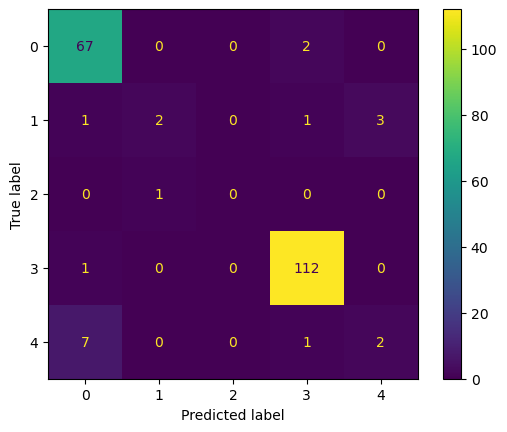

In [24]:
# Predicting the model with best features
y_pred = best_rf.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [25]:
# Training KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8
Precision: 0.45714285714285713
Recall: 0.41709412044925703


c:\Users\User\miniconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

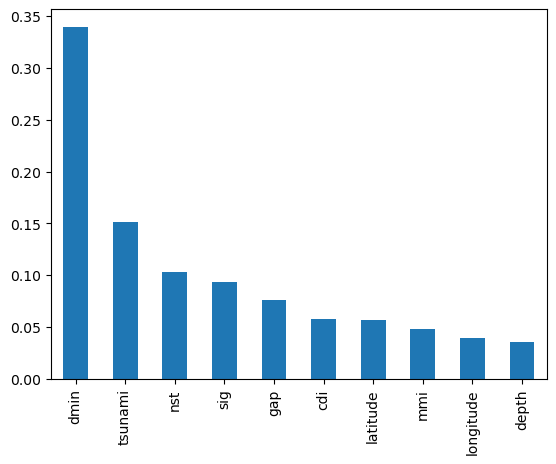

In [26]:
# Feature importances of columns
feature_importances = pd.Series(best_rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_importances.plot.bar()

In [27]:
# Pickle
import pickle

model = RandomForestClassifier()
model.fit(x_train, y_train)

with open('randomforest_confusionmatrix.pickle', 'wb') as file:
    pickle.dump(model, file)

In [28]:
with open('randomforest_confusionmatrix.pickle', 'rb') as file:
    loaded_model = pickle.load(file)